<a href="https://colab.research.google.com/github/fabio-r-almeida/Dissertation/blob/main/New_Disserta%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [115]:
#Imports
#@title ***Dissertation*** - **Vertical Photovoltaic Systems**
#@markdown **Bibliography**

#@markdown [News Article Agro-PV](https://cleantechnica.com/2022/07/25/new-research-says-vertical-solar-panels-have-improved-performance/)

#@markdown [News Article Agro-PV](https://www.pv-magazine.com/2022/05/09/intersolar-products-vertical-pv-system-for-green-rooftops/)

#@markdown [News Article Agro-PV](https://www.pv-magazine.com/2021/12/13/frances-first-vertical-bifacial-solar-power-plant/)

#@markdown [Case Study Optimal Tilt](https://web.stanford.edu/group/efmh/jacobson/Articles/I/TiltAngles.pdf)

#@markdown [Concept for Ago-PV](https://www.next2sun.de/en/our-concept/)
!pip install geopy -q
!pip install requests -q
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import calendar
import seaborn as sns




# ***Chapter 3*** - **Introduction to Calculations and Comparisons**

##Comparisons
As seen previously, using just this the East-West configuration, during the summer months it is possible to receive more Irradiance on the modules than on the conventional 35º inclination. Furthermore it is interesting to note that the East-West configuration changes the typical curvature of the Photovoltaic system to a "double hill" format, starting to produce energy earlier and stopping later than the 35º inclination.

Next, It will be testes combining both approaches to better understand if they can work together and in that way creating a more stable and longer lasting energy production, even if it has a lower peak.

---

<p align="center">
  <img src="https://raw.githubusercontent.com/fabio-r-almeida/Dissertation/main/Files/vertical_panels_2.png" />
</p>

#Benefits to be tested on the East-West Configuration
* It might reduce the overall wear of the modules since it has less solar exposure on the hottest hours of the day.
* It might not destroy the soil since it lets light shine through (during the lowest production hours) making it a good approach for agriculture.
* It might reduce the windblown deposit of dust since it has a vertical orientation.
* It can have a more consistent curve and easier to manage by the distribuitor.

 --- 

# Calculation
The calculations will be performed following four steps.


\begin{align*}
& T_{cell} = T_{amb}+\frac{NOCT - 20}{800} \cdot G \\\\
& P_{DC_{max}} = \frac{P_{STC} \cdot G}{1000}\\\\
& ΔT = T_{cell}-25\\\\
& PV = P_{DC_{max}} \cdot (1 + \alpha_p \cdot ΔT )\\\\
\end{align*}


  






## Distance between Vertical Solar Panels

---
\\
\
\begin{align*}
& D = h \cdot \left( cos(\alphaº) + \frac{sin(\alphaº)}{tan(\beta_Nº)} \right)\\\\
\end{align*}
* $h$ - Height of the Structute/Panels.
* $\alpha$ - Slope of the Panels (Vertical = 90º).
* $\beta_N$ - Solar height.


---

\begin{align*}
& \beta_N  = 90 - L + \deltaº  \\\\
\end{align*}
* $L$ - Latitude of the location.
* $\delta$ - Winter Solstice (-23.45º) is the worst-case scenario.


---
\begin{align*}
& \delta = 23.45º \cdot sin \left(\frac{360º}{365}\right)\cdot(n-81)  \\\\
\end{align*}
* $n$ - number of days since the begining of the year.

---

<p align="center">
  <img src="https://raw.githubusercontent.com/fabio-r-almeida/Dissertation/main/Files/winter.png" />
</p>




In [116]:
import math
print(3*(math.cos(90*math.pi/180) + (math.sin(90*math.pi/180))/(math.tan(23.45*math.pi/180))))

6.916026043434293


# ***Chapter 4*** - **Real Location Simulation**

In this chapter, it will be considered 3 locations in portugal where agriculture already exists in great extend and where Agro-PV could be integrated.

The main scope of this simulation is to better visualize the effect of integrating a mixed configuration.

What is going to be studied:

1. Yearly Energy Production
2. Preservation of the Biodiversity
3. Efficient use of the plot
4. Yearly Profit



In [117]:
#@title # **Location Selection and Data Download**{ run: "auto", display-mode: "form" }
from geopy.geocoders import Nominatim
Nominatim(user_agent="Thesis")
geolocator = Nominatim()

City_1 = "Oeiras" #@param {type:"string"}
#City_2 = "Terceira" #@param {type:"string"}
#City_3 = "Santarem" #@param {type:"string"}

#@markdown Plotting area in meters
Plotting_Area_L = 25 #@param {type:"number"}
Plotting_Area_H = 34 #@param {type:"number"}

location_1 = geolocator.geocode(str(City_1))
#location_2 = geolocator.geocode(str(City_2))
#location_3 = geolocator.geocode(str(City_3))

Optimal_Azimuth = True
Slope = 90 
Normal_Slope = 35 
Latitude = location_1.latitude
Longitude = location_1.longitude

url = f" https://re.jrc.ec.europa.eu/api/v5_2/seriescalc?lat={Latitude}&lon={Longitude}&optimalangles={int(Optimal_Azimuth==True)}&angle={Slope}&outputformat=json"

#Gets the data from the url defined previously
api_response = requests.get(url)
#Converts into readable json
api_response_json = api_response.json()
data = json.loads(json.dumps(api_response_json))

#Gets and calculates the azimuth for the west-east modules
azimuth = data['inputs']['mounting_system']['fixed']['azimuth']['value']
azimuth_east = azimuth + 90
azimuth_west= azimuth - 90

#recalles new data with the updated azimuth
url_east = f" https://re.jrc.ec.europa.eu/api/v5_2/DRcalc?lat={Latitude}&lon={Longitude}&month={0}&aspect={azimuth_east}&angle={Slope}&showtemperatures=1&global=1&outputformat=json"
url_west = f" https://re.jrc.ec.europa.eu/api/v5_2/DRcalc?lat={Latitude}&lon={Longitude}&month={0}&aspect={azimuth_west}&angle={Slope}&showtemperatures=1&global=1&outputformat=json"
url_normal = f" https://re.jrc.ec.europa.eu/api/v5_2/DRcalc?lat={Latitude}&lon={Longitude}&month={0}&aspect={azimuth}&angle={Normal_Slope}&showtemperatures=1&global=1&outputformat=json"

#transforms de requested data into a dataframe with the labels bellow, deleting the Month label
#East modules
api_response_east = requests.get(url_east)
api_response_json_east = api_response_east.json()
data_east = json.loads(json.dumps(api_response_json_east))
df_east = pd.DataFrame(data_east['outputs']['daily_profile'])
df_east.columns = ['Month', 'Time', 'G(i)', 'Gb(i)', 'Gd(i)', 'T2m']
df_east.set_index('Time', inplace=True)
#df_east = df_east.drop(['Month'], axis=1)

#transforms de requested data into a dataframe with the labels bellow, deleting the Month label
#West modules
api_response_west = requests.get(url_west)
api_response_json_west = api_response_west.json()
data_west = json.loads(json.dumps(api_response_json_west))
df_west = pd.DataFrame(data_west['outputs']['daily_profile'])
df_west.columns = ['Month', 'Time', 'G(i)', 'Gb(i)', 'Gd(i)', 'T2m']
df_west.set_index('Time', inplace=True)
#df_west = df_west.drop(['Month'], axis=1)

#transforms de requested data into a dataframe with the labels bellow, deleting the Month label
#35º Modules
api_response_normal = requests.get(url_normal)
api_response_json_normal = api_response_normal.json()
data_normal = json.loads(json.dumps(api_response_json_normal))
df_normal = pd.DataFrame(data_normal['outputs']['daily_profile'])
df_normal.columns = ['Month', 'Time', 'G(i)', 'Gb(i)', 'Gd(i)', 'T2m']
df_normal.set_index('Time', inplace=True)
#df_normal = df_normal.drop(['Month'], axis=1)

/usr/local/lib/python3.7/dist-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


In [118]:
#@title # **Photovoltaic Bifacial Modules Selection**{ run: "auto", display-mode: "form" }

#@markdown Bifacial Module                      |Power      | Price   |-| Module                           | Power      | Price
#@markdown -------------------------------------|-----------|---------| |----------------------------------|------------|--------
#@markdown **LG Neon 2 Bifacial LG410N2T-L5**   | 410 W     | €245.00 | | **LG Neon R LG370Q1C-V5**        | 370 W      | €297.00
#@markdown **LG Neon 2 Bifacial LG415N2T-L5**   | 415 W     | €274.00 | | **LG Neon R LG360Q1C-A5**        | 360 W      | €296.00
#@markdown **LG Neon 2 Bifacial LG400N2T-A5**   | 400 W     | €249.00 | | **LG Neon R Prime LG355Q1K-V5**  | 355 W      | €262.00
#@markdown **LG Neon 2 Bifacial LG430N2T-E6**   | 430 W     | €270.00 | | **LG Neon R Prime LG360Q1K-V5**  | 360 W      | €309.00
#@markdown **LG Neon H Bifacial LG435N2T-E6**   | 435 W     | €319.00 | | **LG Neon 2 LG335N1C-A5**        | 335 W      | €215.00
#@markdown **LG Neon 2 Bifacial LG335N1T-V5**   | 335 W     | €211.00 | | **LG Neon 2 LG340N1C-V5**        | 340 W      | €203.00
#@markdown **LG Neon 2 Bifacial LG425N2T-E6**   | 425 W     | €265.00 | | **LG Neon 2 LG350N1C-V5**        | 350 W      | €211.00
#@markdown **LG Neon 2 Bifacial LG400N2T-J5**   | 400 W     | €249.00 | | **LG Neon H LG380N1C-E6**        | 380 W      | €245.00
#@markdown
#@markdown ---
#@markdown
#@markdown #**Module Selection**
Vertical_Modules = "LG Neon 2 Bifacial LG430N2T-E6" #@param ["LG Neon 2 Bifacial LG410N2T-L5", "LG Neon 2 Bifacial LG415N2T-L5", "LG Neon 2 Bifacial LG400N2T-A5", "LG Neon 2 Bifacial LG430N2T-E6", "LG Neon H Bifacial LG435N2T-E6", "LG Neon 2 Bifacial LG335N1T-V5", "LG Neon 2 Bifacial LG425N2T-E6", "LG Neon 2 Bifacial LG400N2T-J5"]
Horizontal_Modules = "LG Neon H LG380N1C-E6" #@param ["LG Neon R LG370Q1C-V5", "LG Neon R LG360Q1C-A5", "LG Neon R LG370Q1C-V5", "LG Neon R Prime LG355Q1K-V5", "LG Neon R Prime LG360Q1K-V5", "LG Neon 2 LG335N1C-A5", "LG Neon 2 LG340N1C-V5", "LG Neon 2 LG350N1C-V5", "LG Neon H LG380N1C-E6"]


if(Vertical_Modules == "LG Neon 2 Bifacial LG410N2T-L5"):
  Vertical_Max_Power = 410
  Vertical_UMPP = 41.9
  Vertical_IMPP = 9.79
  Vertical_Uoc = 49.4
  Vertical_Isc = 10.46
  Vertical_Efficiency = 19.8
  Vertical_NOCT = 42
  Vertical_alpha_p = -0.35
  Vertical_dimension_L = 1.024
  Vertical_dimension_H = 2.024
  Vertical_dimension_W = 0.04
  Vertical_price = 245

if(Vertical_Modules == "LG Neon 2 Bifacial LG415N2T-L5"):
  Vertical_Max_Power = 415
  Vertical_UMPP = 42.3
  Vertical_IMPP = 9.82
  Vertical_Uoc = 49.5
  Vertical_Isc = 10.5
  Vertical_Efficiency = 20.0
  Vertical_NOCT = 42
  Vertical_alpha_p = -0.35
  Vertical_dimension_L = 1.024
  Vertical_dimension_H = 2.024
  Vertical_dimension_W = 0.04
  Vertical_price = 274

if(Vertical_Modules == "LG Neon 2 Bifacial LG400N2T-A5"):
  Vertical_Max_Power = 400
  Vertical_UMPP = 41.5
  Vertical_IMPP = 9.65
  Vertical_Uoc = 49.7
  Vertical_Isc = 10.22
  Vertical_Efficiency = 18.9
  Vertical_NOCT = 45
  Vertical_alpha_p = -0.36
  Vertical_dimension_L = 1.024
  Vertical_dimension_H = 2.064
  Vertical_dimension_W = 0.04
  Vertical_price = 249

if(Vertical_Modules == "LG Neon 2 Bifacial LG430N2T-E6"):
  Vertical_Max_Power = 430
  Vertical_UMPP = 41.1
  Vertical_IMPP = 10.47
  Vertical_Uoc = 49.1
  Vertical_Isc = 10.94
  Vertical_Efficiency = 19.4
  Vertical_NOCT = 42
  Vertical_alpha_p = -0.33
  Vertical_dimension_L = 1.024
  Vertical_dimension_H = 2.130
  Vertical_dimension_W = 0.04
  Vertical_price = 270


if(Vertical_Modules == "LG Neon H Bifacial LG435N2T-E6"):
  Vertical_Max_Power = 435
  Vertical_UMPP = 41.4
  Vertical_IMPP = 10.51
  Vertical_Uoc = 49.4
  Vertical_Isc = 11.0
  Vertical_Efficiency = 19.6
  Vertical_NOCT = 42
  Vertical_alpha_p = -0.33
  Vertical_dimension_L = 1.024
  Vertical_dimension_H = 2.130
  Vertical_dimension_W = 0.04
  Vertical_price = 319

if(Vertical_Modules == "LG Neon 2 Bifacial LG335N1T-V5"):
  Vertical_Max_Power = 335
  Vertical_UMPP = 34.1
  Vertical_IMPP = 9.83
  Vertical_Uoc = 40.7
  Vertical_Isc = 10.34
  Vertical_Efficiency = 19.6
  Vertical_NOCT = 42
  Vertical_alpha_p = -0.36
  Vertical_dimension_L = 1.016
  Vertical_dimension_H = 1.686
  Vertical_dimension_W = 0.04
  Vertical_price = 211


if(Vertical_Modules == "LG Neon 2 Bifacial LG425N2T-E6"):
  Vertical_Max_Power = 425
  Vertical_UMPP = 40.8
  Vertical_IMPP = 10.42
  Vertical_Uoc = 48.8
  Vertical_Isc = 10.88
  Vertical_Efficiency = 19.1
  Vertical_NOCT = 42
  Vertical_alpha_p = -0.33
  Vertical_dimension_L = 1.042
  Vertical_dimension_H = 2.130
  Vertical_dimension_W = 0.04
  Vertical_price = 265

if(Vertical_Modules == "LG Neon 2 Bifacial LG400N2T-J5"):
  Vertical_Max_Power = 400
  Vertical_UMPP = 41.5
  Vertical_IMPP = 9.65
  Vertical_Uoc = 49.7
  Vertical_Isc = 10.22
  Vertical_Efficiency = 19.3
  Vertical_NOCT = 42
  Vertical_alpha_p = -0.36
  Vertical_dimension_L = 1.024
  Vertical_dimension_H = 2.024
  Vertical_dimension_W = 0.04
  Vertical_price = 249


if(Horizontal_Modules == "LG Neon R LG370Q1C-V5"):
  Horizontal_Max_Power = 370
  Horizontal_UMPP = 37.0
  Horizontal_IMPP = 10.01
  Horizontal_Uoc = 42.8
  Horizontal_Isc = 10.82
  Horizontal_Efficiency = 21.4
  Horizontal_NOCT = 44
  Horizontal_alpha_p = -0.30
  Horizontal_dimension_L = 1.016
  Horizontal_dimension_H = 1.70
  Horizontal_dimension_W = 0.04
  Horizontal_price = 297.00

if(Horizontal_Modules == "LG Neon R LG360Q1C-A5"):
  Horizontal_Max_Power = 360
  Horizontal_UMPP = 36.5
  Horizontal_IMPP = 9.87
  Horizontal_Uoc = 42.7
  Horizontal_Isc = 10.79
  Horizontal_Efficiency = 20.8
  Horizontal_NOCT = 44
  Horizontal_alpha_p = -0.30
  Horizontal_dimension_L = 1.016
  Horizontal_dimension_H = 1.70
  Horizontal_dimension_W = 0.04
  Horizontal_price = 296

if(Horizontal_Modules == "LG Neon R Prime LG355Q1K-V5"):
  Horizontal_Max_Power = 355
  Horizontal_UMPP = 36.4
  Horizontal_IMPP = 9.76
  Horizontal_Uoc = 43.1
  Horizontal_Isc = 10.44
  Horizontal_Efficiency = 20.6
  Horizontal_NOCT = 44
  Horizontal_alpha_p = -0.30
  Horizontal_dimension_L = 1.016
  Horizontal_dimension_H = 1.70
  Horizontal_dimension_W = 0.04
  Horizontal_price = 269

if(Horizontal_Modules == "LG Neon R Prime LG360Q1K-V5"):
  Horizontal_Max_Power = 360
  Horizontal_UMPP = 36.7
  Horizontal_IMPP = 9.82
  Horizontal_Uoc = 43.3
  Horizontal_Isc = 10.5
  Horizontal_Efficiency = 20.8
  Horizontal_NOCT = 44
  Horizontal_alpha_p = -0.30
  Horizontal_dimension_L = 1.016
  Horizontal_dimension_H = 1.70
  Horizontal_dimension_W = 0.04
  Horizontal_price = 309

if(Horizontal_Modules == "LG Neon 2 LG335N1C-A5"):
  Horizontal_Max_Power = 335
  Horizontal_UMPP = 34.1
  Horizontal_IMPP = 9.83
  Horizontal_Uoc = 41.0
  Horizontal_Isc = 10.49
  Horizontal_Efficiency = 19.6
  Horizontal_NOCT = 42
  Horizontal_alpha_p = -0.36
  Horizontal_dimension_L = 1.016
  Horizontal_dimension_H = 1.686
  Horizontal_dimension_W = 0.04
  Horizontal_price = 215
  
if(Horizontal_Modules == "LG Neon 2 LG340N1C-V5"):
  Horizontal_Max_Power = 340
  Horizontal_UMPP = 34.5
  Horizontal_IMPP = 9.86
  Horizontal_Uoc = 41.1
  Horizontal_Isc = 10.53
  Horizontal_Efficiency = 19.8
  Horizontal_NOCT = 42
  Horizontal_alpha_p = -0.36
  Horizontal_dimension_L = 1.016
  Horizontal_dimension_H = 1.686
  Horizontal_dimension_W = 0.04
  Horizontal_price = 203

if(Horizontal_Modules == "LG Neon 2 LG350N1C-V5"):
  Horizontal_Max_Power = 350
  Horizontal_UMPP = 35.3
  Horizontal_IMPP = 9.92
  Horizontal_Uoc = 41.3
  Horizontal_Isc = 10.61
  Horizontal_Efficiency = 20.4
  Horizontal_NOCT = 42
  Horizontal_alpha_p = -0.36
  Horizontal_dimension_L = 1.016
  Horizontal_dimension_H = 1.686
  Horizontal_dimension_W = 0.04
  Horizontal_price = 211

if(Horizontal_Modules == "LG Neon H LG380N1C-E6"):
  Horizontal_Max_Power = 380
  Horizontal_UMPP = 35.1
  Horizontal_IMPP = 10.85
  Horizontal_Uoc = 41.7
  Horizontal_Isc = 11.39
  Horizontal_Efficiency = 20.6
  Horizontal_NOCT = 42
  Horizontal_alpha_p = -0.33
  Horizontal_dimension_L = 1.042
  Horizontal_dimension_H = 1.768
  Horizontal_dimension_W = 0.04
  Horizontal_price = 245

  #@title # **Modules quantity and spacing calculations**{ run: "auto", display-mode: "form" }
#@markdown To simulate a real location with real equipment, it will be made the following assumptions:

#@markdown 1. Data provided for this simulation are Monthly Averages from the year 2005 to 2020.
#@markdown 2. Considering this is an Agro-PV simulation, no building shadows will be considered.
#@markdown 3. No albedo reflection are to be considered since the vertically mounted modules will be at 90º.
#@markdown 4. The modules will be considered to be clean.
#@markdown 5. Vertical modules mounted in pairs, 1m from the ground 
#@markdown 6. Horizontal modules mounted 0.15m from the ground 
#@markdown 7. Spacing will be calculated considering a worst-case scenario (Winter Solstice with -23.45º)
import math

def get_total(config):
  '''
  receives a string -> numberxnumber and calculates the total
  '''
  config = config.split('x')
  L = int(config[0])
  H = int(config[1])
  return L * H

def modules_spacing_func(MHeight,Inclination):
  import math
  return round(MHeight*(math.cos(Inclination*math.pi/180) + (math.sin(Inclination*math.pi/180))/(math.tan(23.45*math.pi/180))),2)

def module_quantity(MLength, MHeight, PLength, PHeight, Inclination):
  """
    test_function does blah blah blah.

    :MLength : Module config Length
    :MHeight : Module config Height
    :PLength : Plot config Length
    :PHeight : Plot config Height
    :Inclination: Module Inclination
  """ 
  import math
  modules_in_string = math.floor(PLength/MLength)
  modules_spacing = modules_spacing_func(MHeight,Inclination)
  number_of_strings = math.floor(PHeight/modules_spacing)

  return f"{modules_in_string}x{number_of_strings}"

def calculate_hourly_production(NOCT, Tamb, G, PSTC, alpha):
  T_cell = Tamb + (NOCT-20)/800 * G
  Pdc_max = PSTC*G/1000
  delta_T = T_cell - 25
  PV = Pdc_max * (1+alpha/100*T_cell)
  return PV

#Vertical Modules quantity:
#Considering being doublestacked with 1m from the ground
vertical_quantity = module_quantity(Vertical_dimension_H,Vertical_dimension_L*2+1,Plotting_Area_L,Plotting_Area_H,90).split('x')
#correction since we use 2 modules in the calculations
vertical_quantity_L = int(vertical_quantity[0])*2
vertical_quantity_H = vertical_quantity[1]
vertical_quantity = f"{vertical_quantity_L}x{vertical_quantity_H}"
print("Vertically mounted PV system")
print(f"PV Config: {vertical_quantity} with a total of {get_total(vertical_quantity)} Modules")
print(f"Occupied Plotting Area: {(get_total(vertical_quantity)*Vertical_dimension_W*Vertical_dimension_L)/(Plotting_Area_H*Plotting_Area_L)*100}%")
print(f'Total investment (on modules) {get_total(vertical_quantity)*Vertical_price} €')


print("\n\nHorizontally mounted PV system")
horizontal_quantity = module_quantity(Horizontal_dimension_L,Horizontal_dimension_H+0.15,Plotting_Area_L,Plotting_Area_H,35)
print(f"PV Config: {horizontal_quantity} with a total of {get_total(horizontal_quantity)} Modules")
print(f"Occupied Plotting Area: {(get_total(horizontal_quantity)*math.cos(35*math.pi/180)*Horizontal_dimension_H*Horizontal_dimension_L)/(Plotting_Area_H*Plotting_Area_L)*100}%")
print(f'Total investment (on modules) {get_total(horizontal_quantity)*Horizontal_price} €')









df_normal['T_Power'] = 0
df_normal['W/Wp'] = 0
df = df_normal.copy()
for i in range(0,len(df_normal)):
  df.iat[i,-2]=calculate_hourly_production(Horizontal_NOCT,df_normal['T2m'].iloc[i],df_normal['G(i)'].iloc[i],Horizontal_Max_Power,Horizontal_alpha_p)*get_total(horizontal_quantity)
  df.iat[i,-1]=calculate_hourly_production(Horizontal_NOCT,df_normal['T2m'].iloc[i],df_normal['G(i)'].iloc[i],Horizontal_Max_Power,Horizontal_alpha_p)/Horizontal_Max_Power
df_normal = df.copy()

df_west['T_Power'] = 0
df_west['W/Wp'] = 0
df = df_west.copy()
for i in range(0,len(df_west)):
  df.iat[i,-2]=calculate_hourly_production(Vertical_NOCT,df_west['T2m'].iloc[i],df_west['G(i)'].iloc[i],Vertical_Max_Power,Vertical_alpha_p)*get_total(vertical_quantity)
  df.iat[i,-1]=calculate_hourly_production(Vertical_NOCT,df_west['T2m'].iloc[i],df_west['G(i)'].iloc[i],Vertical_Max_Power,Vertical_alpha_p)/Vertical_Max_Power
df_west = df.copy()

df_east['T_Power'] = 0
df_east['W/Wp'] = 0
df = df_east.copy()
for i in range(0,len(df_east)):
  df.iat[i,-2]=calculate_hourly_production(Vertical_NOCT,df_east['T2m'].iloc[i],df_east['G(i)'].iloc[i],Vertical_Max_Power,Vertical_alpha_p)*get_total(vertical_quantity)
  df.iat[i,-1]=calculate_hourly_production(Vertical_NOCT,df_east['T2m'].iloc[i],df_east['G(i)'].iloc[i],Vertical_Max_Power,Vertical_alpha_p)/Vertical_Max_Power
df_east = df.copy()



Vertically mounted PV system
PV Config: 22x4 with a total of 88 Modules
Occupied Plotting Area: 0.4240564705882353%
Total investment (on modules) 23760 €


Horizontally mounted PV system
PV Config: 23x8 with a total of 184 Modules
Occupied Plotting Area: 32.66731169466748%
Total investment (on modules) 45080 €


Average €/W for Horizontal Setup 0.13633333333333333
Average €/W for Vertical Setup 0.14425
Lower is better


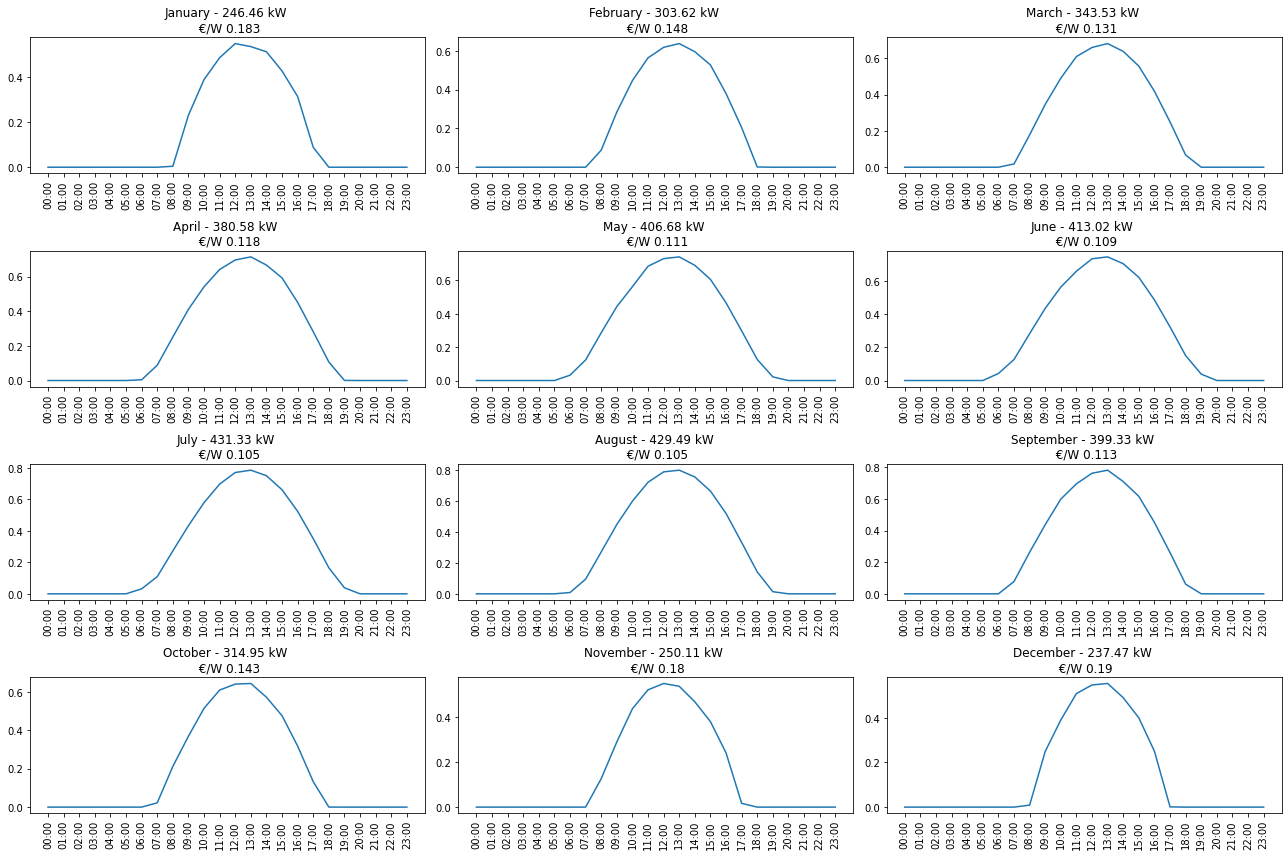

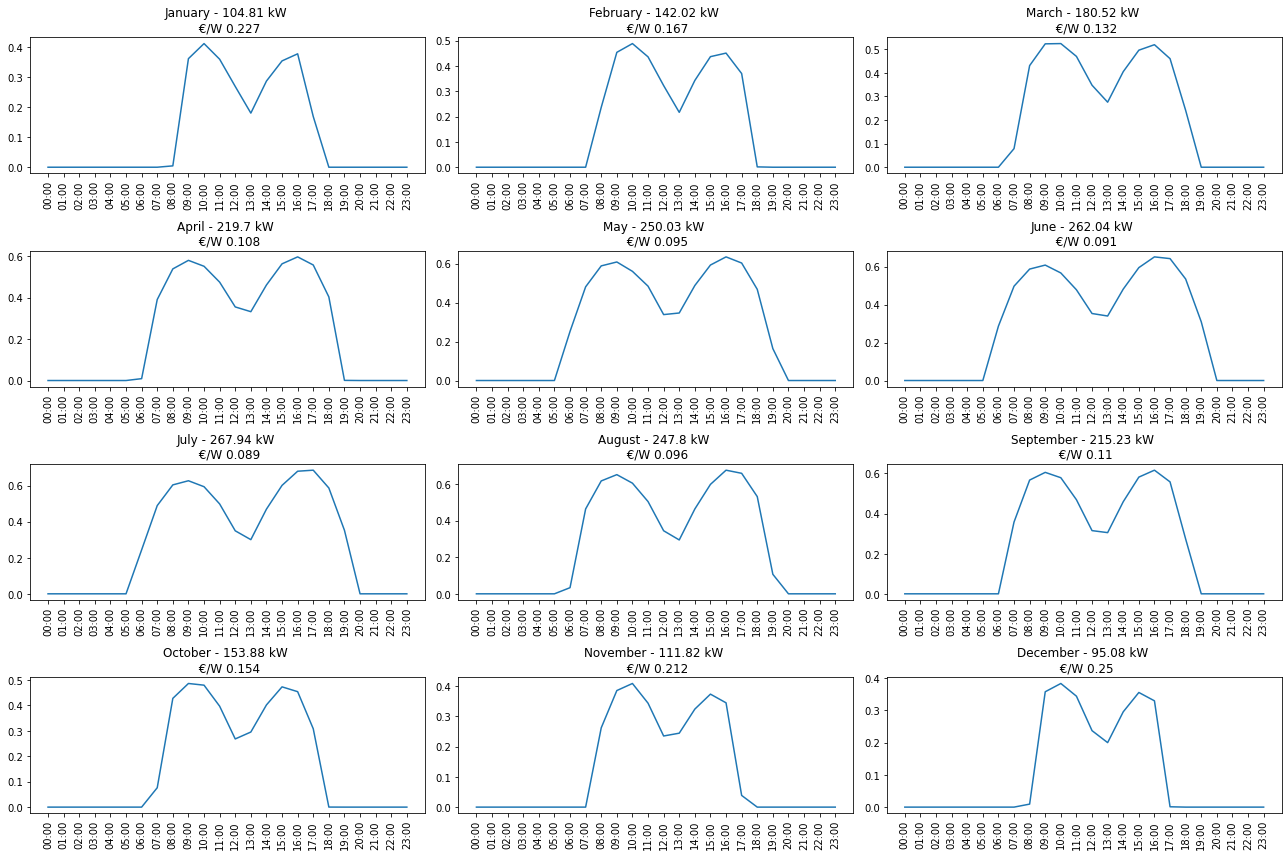

In [119]:
#@title # **Simulated Monthly Energy Production**{ display-mode: "form"}

fig, axs = plt.subplots(4, 3,figsize=(18,12))
Horizontal_Total_Price = get_total(horizontal_quantity)*Horizontal_price
df_normal['Index'] = df_normal.index
Month_Name = ["January", "February", "March", "April", "May", "June", "July","August", "September", "October", "November", "December"]

Month = 0
Horizontal_Average_euro_per_watt = 0
for i in range(0,4):
  for j in range(0,3):
    axs[i, j].set_title(f'{Month_Name[Month]} - {round(df_normal["T_Power"].iloc[24*Month:24*(Month+1)].sum()/1000 ,2)} kW \n  €/W {round(Horizontal_Total_Price/df_normal["T_Power"].iloc[24*Month:24*(Month+1)].sum() ,3)} ')
    axs[i, j].plot(df_normal["Index"].iloc[24*Month:24*(Month+1)] ,  df_normal["W/Wp"].iloc[24*Month:24*(Month+1)])
    axs[i,j].tick_params(axis='x', rotation=90)
    Horizontal_Average_euro_per_watt = Horizontal_Average_euro_per_watt + round(Horizontal_Total_Price/df_normal["T_Power"].iloc[24*Month:24*(Month+1)].sum() ,3)
    Month = Month + 1
fig.tight_layout()



df_east_west = df_east.add(df_west, fill_value=0)
fig, axs = plt.subplots(4, 3,figsize=(18,12))
Vertical_Total_Price = get_total(vertical_quantity)*Vertical_price
df_east_west['Index'] = df_east_west.index

Month = 0
Vertical_Average_euro_per_watt = 0
for i in range(0,4):
  for j in range(0,3):
    axs[i, j].set_title(f'{Month_Name[Month]} - {round(df_east_west["T_Power"].iloc[24*Month:24*(Month+1)].sum()/1000 ,2)} kW \n  €/W {round(Vertical_Total_Price/df_east_west["T_Power"].iloc[24*Month:24*(Month+1)].sum() ,3)} ')
    axs[i, j].plot(df_east_west["Index"].iloc[24*Month:24*(Month+1)] ,  df_east_west["W/Wp"].iloc[24*Month:24*(Month+1)])
    axs[i,j].tick_params(axis='x', rotation=90)
    Vertical_Average_euro_per_watt = Vertical_Average_euro_per_watt + round(Vertical_Total_Price/df_east_west["T_Power"].iloc[24*Month:24*(Month+1)].sum() ,3)
    Month = Month + 1
fig.tight_layout()

print(f"Average €/W for Horizontal Setup {Horizontal_Average_euro_per_watt/12}")
print(f"Average €/W for Vertical Setup {Vertical_Average_euro_per_watt/12}")
print("Lower is better")